# <span style="color:Green">Building a Book Recommendation System</span>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import norm
style.use('seaborn')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Importing the .csv Files

In [5]:
Book_Data = pd.read_csv("BX-Books.csv",sep=';',encoding="latin-1", error_bad_lines=False)
Book_Ratings_Data = pd.read_csv("BX-Book-Ratings.csv",sep=';',encoding="latin-1", error_bad_lines=False)
User_Data = pd.read_csv("BX-Users.csv",sep=';', error_bad_lines=False, encoding="latin-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


# <span style="color:Purple">Exploratory Data Analysis</span>

## Data Preparation and Data Cleaning

In [6]:
#shows count of missing values in each column of Book_Data df
Book_Data.isna().sum() 

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [7]:
#shows count of missing values in each column of Book_Ratings_Data df

Book_Ratings_Data.isna().sum() 

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [8]:
#shows count of missing values in each column of User_Data df

User_Data.isna().sum() 

User-ID          0
Location         0
Age         110762
dtype: int64

In [9]:
#head is used to get first 5 rows

Book_Data.head() 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [10]:
# Renaming Book_Data df column names

Book_Data.rename(columns = {"Book-Title" : "Book_Title","Book-Author": "Book_Author","Year-Of-Publication":"Year_Of_Publication","Image-URL-S":"Image_URL_S","Image-URL-M":"Image_URL_M","Image-URL-L": "Image_L",}, inplace=True)


In [11]:
#populates first 5 rows from Book_data df

Book_Data.head() 

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [12]:
# Renaming column names from Book_Ratings_Data

Book_Ratings_Data.rename(columns = {"Book-Rating":"Book_Rating","User-ID":"User_ID"},inplace = True)


In [13]:
Book_Ratings_Data

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [14]:
User_Data.rename(columns = {"User-ID":"User_ID"},inplace = True) #renaming User_Data column name

In [15]:
User_Data.head()

,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In the User File, The Location column is represented with state and country. To which we are splitting the Country and created a new column as Country. 

In [16]:
import re
countries=[]
for i in list(User_Data["Location"]):  
    chunks = i.split(", ")        #splitting location column data by country wise
#     print(i)
#     chunks = re.split('[_,][_,]',i)
    if chunks[-1] != ',':
        countries.append(chunks[-1])
    else:
        countries.append(None)
countries

['usa',
 'usa',
 'russia',
 'portugal',
 'united kingdom',
 'usa',
 'usa',
 'canada',
 'usa',
 'spain',
 'australia',
 'usa',
 'spain',
 'usa',
 'canada',
 'usa',
 'usa',
 'brazil',
 None,
 'usa',
 'spain',
 'germany',
 'usa',
 'germany',
 'usa',
 'usa',
 'usa',
 'germany',
 'mexico',
 'usa',
 'china',
 'usa',
 'usa',
 'united kingdom',
 'usa',
 'canada',
 'spain',
 'italy',
 'usa',
 'usa',
 'usa',
 'usa',
 'distrito federal',
 'usa',
 'germany',
 'germany',
 'italy',
 'usa',
 'italy',
 'united kingdom',
 'usa',
 'germany',
 'usa',
 'usa',
 'canada',
 'usa',
 'italy',
 'canada',
 'usa',
 'italy',
 'usa',
 'usa',
 'usa',
 'france',
 'australia',
 'canada',
 'usa',
 'canada',
 'canada',
 'usa',
 'canada',
 'united kingdom',
 'usa',
 'netherlands',
 'usa',
 'usa',
 'canada',
 'usa',
 'canada',
 'canada',
 'usa',
 'usa',
 'usa',
 'usa',
 'united kingdom',
 'usa',
 'usa',
 'usa',
 'usa',
 'usa',
 None,
 'spain',
 'usa',
 'iraq',
 'usa',
 'finland',
 'usa',
 'new zealand',
 'usa',
 'spain',


In [17]:
User_Data["Country"] = countries

In [18]:
User_Data.head(5)

,User_ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom


In [19]:
User_Data["Country"].fillna("usa", inplace = True) #replaces null values with usa

### Top 10 Authors with most selling Books

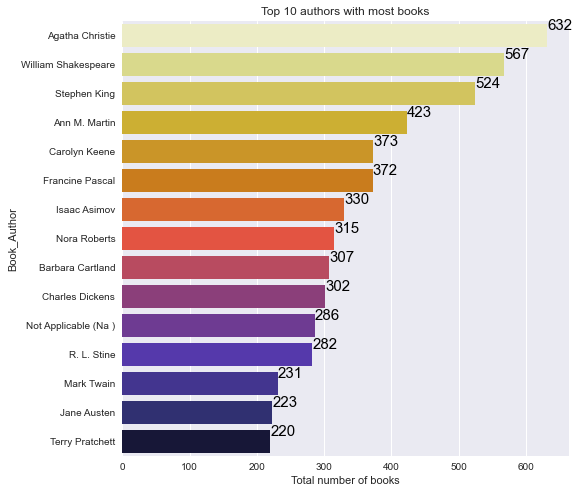

In [22]:
plt.figure(figsize=(8,8))
ax = sns.barplot(top_15_authors['Book_Title'], top_15_authors.index, palette='CMRmap_r')

ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

The above bar graph shows Book authors with total number of books published. Agatha Christie is the top most author with most number of books published.

### Countries with Total counts of Users rated the Books

In [150]:
cm=sns.light_palette('red',as_cmap=True)
popular=User_Data.Country.value_counts().to_frame()[:10]
popular.rename(columns={'Country':'Count_Users_Country'},inplace=True)
popular.style.background_gradient(cmap=cm)

,Count_Users_Country
usa,142600
canada,21658
united kingdom,18538
germany,17043
spain,13147
australia,11784
italy,11266
france,3455
portugal,3325
new zealand,3097


The above table shows number of users per country. We can see that first highest country to have maximum number of users is usa.

### Understanding the Distributions in Age Column

<AxesSubplot:xlabel='Age', ylabel='Density'>

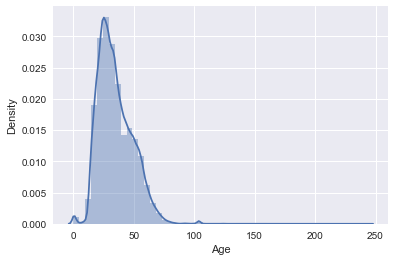

In [26]:
sns.distplot(User_Data.Age)

Seaborn distplot showing age distribution. We can observe that the density is more across age group 15 to 45.

Text(0.5, 1.0, 'Outlier data in Age column')

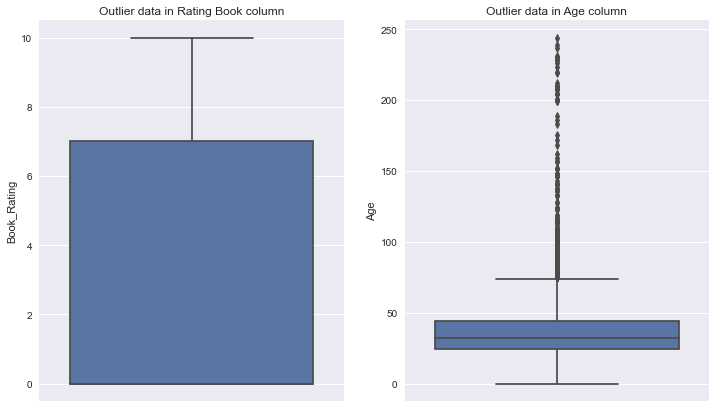

In [27]:
f,ax=plt.subplots(1,2,figsize=(12,7))
#box-plot showing outliers in age and book rating columns.
sns.boxplot(y='Book_Rating', data=Book_Ratings_Data,ax=ax[0])
ax[0].set_title('Outlier data in Rating Book column')
sns.boxplot(y='Age', data=User_Data,ax=ax[1])
ax[1].set_title('Outlier data in Age column')

Two box-plots representing outlier data in Book rating and Age column. Here, age column has more number of outliers.

In [28]:
sorted(Book_Ratings_Data['Book_Rating'].unique()) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [29]:
#converting all the outlier age data to nan
User_Data.loc[(User_Data.Age > 100 ) | (User_Data.Age < 5),'Age']=np.nan 

<AxesSubplot:ylabel='Frequency'>

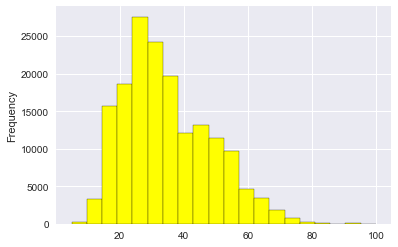

In [30]:
User_Data.Age.plot.hist(bins=20,edgecolor='black',color='Yellow')

Box-plot representing age data after outlier removal. We removed unnecessary data like age greater than 100 and less than 5.

In [31]:
#checking skewness for age
round(User_Data.Age.skew(axis=0,skipna=True),3)

0.675

In [32]:
# Series of users data live in which country 
countryUsers = User_Data.Country.value_counts()

In [33]:
country=countryUsers[countryUsers>=5].index.tolist() 

In [34]:
#range of age users in country registered and had participation 
RangeOfAge = User_Data.loc[User_Data.Country.isin(country)][['Country','Age']].groupby('Country').agg(np.mean).to_dict()

In [35]:
for k,v in RangeOfAge['Age'].items():
    User_Data.loc[(User_Data.Age.isnull())&(User_Data.Country== k),'Age'] = v

In [36]:
#returns number of missing values in the dataset
User_Data.isnull().sum() 

User_ID       0
Location      0
Age         722
Country       0
dtype: int64

In [37]:
#filling na value from median
medianAge = int(User_Data.Age.median())
User_Data.loc[User_Data.Age.isnull(),'Age']=medianAge

In [38]:
#returns number of missing values in the dataset
User_Data.isnull().sum()

User_ID     0
Location    0
Age         0
Country     0
dtype: int64

### Data cleaning for Book Author and Year of Pubication Column

In [39]:
#Book_Author column that has nan value
Book_Data[Book_Data.Book_Author.isnull()]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [40]:
Book_Data.loc[(Book_Data.ISBN=='9627982032'),'Book_Author']='other'
Book_Data.loc[(Book_Data.ISBN=='193169656X'),'Publisher']='other'
Book_Data.loc[(Book_Data.ISBN=='1931696993'),'Publisher']='other'

In [41]:
Book_Data.loc[Book_Data.ISBN=='2070426769','Year_Of_Publication']=2003
Book_Data.loc[Book_Data.ISBN=='2070426769','Book_Author']='Gallimard'

In [42]:
Book_Data.loc[Book_Data.ISBN=='0789466953','Year_Of_Publication']=2000
Book_Data.loc[Book_Data.ISBN=='0789466953','Book_Author']='DK Publishing Inc'
Book_Data.loc[Book_Data.ISBN=='078946697X','Year_Of_Publication']=2000
Book_Data.loc[Book_Data.ISBN=='078946697X','Book_Author']='DK Publishing Inc'

### Understanding the Distributions in Year Of Publication Column

In [43]:
Book_Data.Year_Of_Publication=Book_Data.Year_Of_Publication.astype(np.int32)

In [44]:
#summerizing data for Book_Data df
Book_Data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book_Title           271360 non-null  object
 2   Book_Author          271360 non-null  object
 3   Year_Of_Publication  271360 non-null  int32 
 4   Publisher            271360 non-null  object
 5   Image_URL_S          271360 non-null  object
 6   Image_URL_M          271360 non-null  object
 7   Image_L              271357 non-null  object
dtypes: int32(1), object(7)
memory usage: 15.5+ MB


<AxesSubplot:xlabel='Year_Of_Publication', ylabel='Density'>

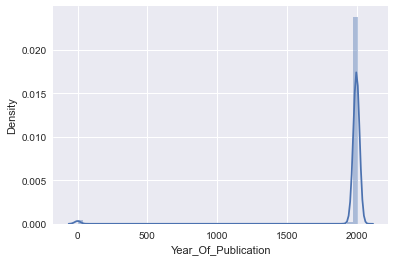

In [45]:
sns.distplot(Book_Data['Year_Of_Publication'])

From the seaborn histplot above, year of publication in the year 2000 is showing highest peak.

In [46]:
Books= Book_Data.copy()

<AxesSubplot:xlabel='Year_Of_Publication', ylabel='Density'>

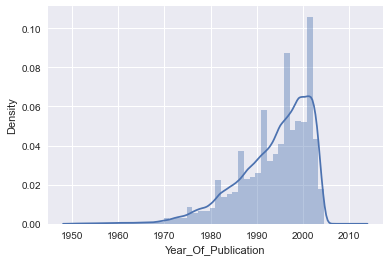

In [47]:
Books = Books[(Books['Year_Of_Publication']>=1950) & (Books['Year_Of_Publication']<=2016)]
sns.distplot(Books['Year_Of_Publication'])

 Generated distplot that shows line curve of books published from year 1950 to 2016.The graph peaked at 2001.

In [48]:
print(sorted(Book_Data.Year_Of_Publication.unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [49]:
#Putting NAN value to books published after 2021 and 0 since it's not normal.
Book_Data.loc[(Book_Data.Year_Of_Publication>=2021)|(Book_Data.Year_Of_Publication==0),'Year_Of_Publication']=np.NAN

In [50]:
Book_Data.isnull().sum()

ISBN                      0
Book_Title                0
Book_Author               0
Year_Of_Publication    4632
Publisher                 0
Image_URL_S               0
Image_URL_M               0
Image_L                   3
dtype: int64

In [51]:
#Replacing the year of publication null values with mean
Book_Data.loc[Book_Data.Year_Of_Publication.isnull(),'Year_Of_Publication'] = round(Book_Data.Year_Of_Publication.mean())

In [52]:
author=Book_Data[Book_Data.Year_Of_Publication.isnull()].Book_Author.unique().tolist()

In [53]:
RangeYearOfPublication = Book_Data.loc[Book_Data.Book_Author.isin(author)][['Book_Author','Year_Of_Publication']].groupby('Book_Author').agg(np.mean).round(0).to_dict()

### Understanding the Ratings Distribution

In [54]:
#creating a new Rating_book dataset
ratings_new = Book_Ratings_Data[Book_Ratings_Data.ISBN.isin(Book_Data.ISBN)]
ratings_new = ratings_new[ratings_new.User_ID.isin(User_Data.User_ID)]

In [55]:
ratings_0 = ratings_new[ratings_new.Book_Rating ==0]
ratings_1to10 = ratings_new[ratings_new.Book_Rating !=0]
# Create column Rating average 
ratings_1to10['rating_Avg']=ratings_1to10.groupby('ISBN')['Book_Rating'].transform('mean')
# Create column Rating sum
ratings_1to10['rating_sum']=ratings_1to10.groupby('ISBN')['Book_Rating'].transform('sum')

In [56]:
#merging datasets
dataset=User_Data.copy()
dataset=pd.merge(dataset,ratings_1to10,on='User_ID')
dataset=pd.merge(dataset,Book_Data,on='ISBN')

<AxesSubplot:xlabel='Book_Rating', ylabel='count'>

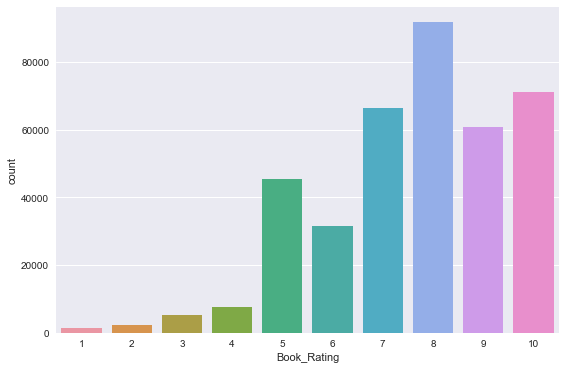

In [143]:
fig, ax = plt.subplots(figsize=(9,6))
sns.countplot(data=ratings_1to10,x='Book_Rating',ax=ax)

The above generated countplot/barplot shows the users count for Book_Rating. Majority of the users gave 8 for book_rating and second highest users count was given for rating 10.


## <span style="color:Purple">Popularity Based Approach</span>

In [58]:
dataset.shape

(383842, 15)

In [59]:
print(dataset.columns.tolist())

['User_ID', 'Location', 'Age', 'Country', 'ISBN', 'Book_Rating', 'rating_Avg', 'rating_sum', 'Book_Title', 'Book_Author', 'Year_Of_Publication', 'Publisher', 'Image_URL_S', 'Image_URL_M', 'Image_L']


In [60]:
dataset.head()

,User_ID,Location,Age,Country,ISBN,Book_Rating,rating_Avg,rating_sum,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_L
0,8,"timmins, ontario, canada",35.311347,canada,0002005018,5,7.666667,69,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
1,11676,"n/a, n/a, n/a",30.600000,n/a,0002005018,8,7.666667,69,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,67544,"toronto, ontario, canada",30.000000,canada,0002005018,8,7.666667,69,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,116866,"ottawa, ,",37.922511,usa,0002005018,9,7.666667,69,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,123629,"kingston, ontario, canada",35.311347,canada,0002005018,9,7.666667,69,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [61]:
dataset['Count_All_Rate']=dataset.groupby('ISBN')['User_ID'].transform('count')

In [62]:
C = dataset['rating_Avg'].mean()
m = dataset['Count_All_Rate'].quantile(0.90)
Top_books = dataset.loc[dataset['rating_sum']>= m]
print(f'C={C}, m={m}')
Top_books.shape

C=7.626700569504765, m=64.0


(147981, 16)

In [63]:
def weighted_rating(x, m=m, C=C):
    v = x['Count_All_Rate']
    R = x['rating_Avg']
    return (v/(v+m) * R) + (m/(m+v) * C)
Top_books['Score'] = Top_books.apply(weighted_rating, axis=1)

Top_books = Top_books.sort_values('Score', ascending = False)

In [149]:
# cm=sns.light_palette('yellow',as_cmap=True)
# count all rate means include users rated 0 to book
popular=dataset.groupby(['Book_Title','Count_All_Rate','rating_Avg','rating_sum']).size().reset_index().sort_values(['rating_sum','rating_Avg',0],
                                                                                                            ascending=[False,False,True])[:20]
popular.rename(columns={0:'Score'},inplace=True)
popular.style.background_gradient(cmap=cm)

,Book_Title,Count_All_Rate,rating_Avg,rating_sum,Score
121013,The Lovely Bones: A Novel,707,8.185290,5787,707
112556,The Da Vinci Code,487,8.435318,4108,487
126239,The Red Tent (Bestselling Backlist),383,8.182768,3134,383
49678,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),313,8.939297,2798,313
127657,The Secret Life of Bees,307,8.452769,2595,307
145190,Wild Animus,581,4.390706,2551,581
32739,Divine Secrets of the Ya-Ya Sisterhood: A Novel,320,7.887500,2524,320
144220,Where the Heart Is (Oprah's Book Club (Paperback)),295,8.142373,2402,295
46267,Girl with a Pearl Earring,278,7.982014,2219,278
8879,Angels & Demons,269,8.100372,2179,269


## <span style="color:Purple">Collaborative Filtering Using k-Nearest Neighbors (kNN)</span>

In [65]:
#ratings has 1031136 rows and three columns

ratings_new.shape

(1031136, 3)

In [66]:
#excluding books with less than 100 ratings and users with less than 50 ratings

counts1 = ratings_1to10['User_ID'].value_counts()
ratings = ratings_1to10[ratings_1to10['User_ID'].isin(counts1[counts1 >= 100].index)]
counts = ratings['Book_Rating'].value_counts()
ratings = ratings[ratings['Book_Rating'].isin(counts[counts >= 50].index)]

In [67]:
#merging ratings and book df on ISBN

combine_book_rating = pd.merge(ratings, Books, on='ISBN')
columns = ['Year_Of_Publication', 'Publisher', 'Book_Author', 'Image_URL_M', 'Image_URL_S', 'Image_L']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,User_ID,ISBN,Book_Rating,rating_Avg,rating_sum,Book_Title
0,277427,002542730X,10,7.805195,601,Politically Correct Bedtime Stories: Modern Ta...
1,11676,002542730X,6,7.805195,601,Politically Correct Bedtime Stories: Modern Ta...
2,12538,002542730X,10,7.805195,601,Politically Correct Bedtime Stories: Modern Ta...
3,52584,002542730X,10,7.805195,601,Politically Correct Bedtime Stories: Modern Ta...
4,110934,002542730X,6,7.805195,601,Politically Correct Bedtime Stories: Modern Ta...


In [68]:
#grouping by book_title and creating a new column total_rating_count

combine_book_rating = combine_book_rating.dropna(axis=0, subset = ['Book_Title'])

book_ratingCount = (combine_book_rating.
                    groupby(by=['Book_Title'])['Book_Rating'].count().reset_index().
                    rename(columns = {'Book_Rating': 'Total_Rating_count'})
                    [['Book_Title','Total_Rating_count']]
                   )

book_ratingCount.head(10)

,Book_Title,Total_Rating_count
0,A Light in the Storm: The Civil War Diary of ...,1
1,Dark Justice,1
2,Earth Prayers From around the World: 365 Pray...,1
3,Final Fantasy Anthology: Official Strategy Gu...,1
4,Good Wives: Image and Reality in the Lives of...,2
5,Highland Desire (Zebra Splendor Historical Ro...,1
6,Little Comic Shop of Horrors (Give Yourself G...,1
7,Murder of a Sleeping Beauty (Scumble River My...,3
8,Nonbook Materials: The Organization of Integr...,1
9,"Q-Space (Star Trek The Next Generation, Book 47)",1


In [69]:
#combining rating data with total_rating_count

rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'Book_Title', right_on = 'Book_Title', how = 'left')
rating_with_totalRatingCount.head()

,User_ID,ISBN,Book_Rating,rating_Avg,rating_sum,Book_Title,Total_Rating_count
0,277427,002542730X,10,7.805195,601,Politically Correct Bedtime Stories: Modern Ta...,16
1,11676,002542730X,6,7.805195,601,Politically Correct Bedtime Stories: Modern Ta...,16
2,12538,002542730X,10,7.805195,601,Politically Correct Bedtime Stories: Modern Ta...,16
3,52584,002542730X,10,7.805195,601,Politically Correct Bedtime Stories: Modern Ta...,16
4,110934,002542730X,6,7.805195,601,Politically Correct Bedtime Stories: Modern Ta...,16


In [70]:
rating_with_totalRatingCount.shape

(102089, 7)

In [71]:
#creating a popularity_threshold and setting it to 20.

popularity_threshold = 20
rating_popular_book = rating_with_totalRatingCount.query('Total_Rating_count >= @popularity_threshold')
rating_popular_book.head()

,User_ID,ISBN,Book_Rating,rating_Avg,rating_sum,Book_Title,Total_Rating_count
29,277427,0061009059,9,7.940299,1064,One for the Money (Stephanie Plum Novels (Pape...,22
30,6251,0061009059,7,7.940299,1064,One for the Money (Stephanie Plum Novels (Pape...,22
31,6543,0061009059,8,7.940299,1064,One for the Money (Stephanie Plum Novels (Pape...,22
32,8067,0061009059,10,7.940299,1064,One for the Money (Stephanie Plum Novels (Pape...,22
33,11676,0061009059,8,7.940299,1064,One for the Money (Stephanie Plum Novels (Pape...,22


In [72]:
rating_popular_book.shape

(5283, 7)

In [73]:
#dropping duplicates and assigning variables to generate pivot table

from scipy.sparse import csr_matrix
rating_popular_book = rating_popular_book.drop_duplicates(['User_ID', 'Book_Title'])
rating_popular_book_pivot = rating_popular_book.pivot(index = 'Book_Title', columns = 'User_ID', values = 'Book_Rating').fillna(0)
rating_popular_book_matrix = csr_matrix(rating_popular_book_pivot.values)

### Creating a User - Book Matrix

In [74]:
rating_popular_book_pivot.head()

User_ID,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,268932,269566,270713,271448,271705,273113,274061,274301,275970,277427
Book_Title,,,,,,,,,,,,,,,,,,,,,
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
A Painted House,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

In [78]:
model_knn = NearestNeighbors(metric='cosine', algorithm= 'brute')
model_knn.fit(rating_popular_book_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [79]:
#creating a query_index variable to generate random index number

query_index = np.random.choice(rating_popular_book_pivot.shape[0])
print(query_index)

135


In [80]:
#applying model and setting n_neighbours to 6.

distances,indices = model_knn.kneighbors(rating_popular_book_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

In [81]:
#Printing book_title for index 6

rating_popular_book_pivot.index[query_index]

'The Last Precinct'

In [85]:
#Using distances to create 5 recommendations based on index number generated

for i in range(0, len(distances.flatten())):
    if i == 0:
        print("recommendations for {0}\n".format(rating_popular_book_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i,rating_popular_book_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

recommendations for The Last Precinct

1: Cradle and All, with distance of 0.5929917592871483:
2: Unnatural Exposure, with distance of 0.6549574709417327:
3: A Painted House, with distance of 0.698789498476275:
4: Four Blind Mice, with distance of 0.7133233783138562:
5: 2nd Chance, with distance of 0.727662987200354:



## <span style="color:Purple">KMeans with Principal Component Analysis</span>

In [86]:
ratings_new.shape

(1031136, 3)

In [87]:
# Taking the mean of rating given by each user
User_rating_mean = ratings_new.groupby('User_ID')['Book_Rating'].mean()
user_rating = ratings_new.set_index('User_ID')
user_rating['mean_rating'] = User_rating_mean
user_rating.reset_index(inplace=True)
# Keeping the books in which users "likes" the book
user_rating = user_rating[user_rating['Book_Rating'] > user_rating['mean_rating']]
# Initializing a dummy variable for future use
user_rating['is_fav'] = 1
print(user_rating.shape)
user_rating.head()

(313503, 5)


,User_ID,ISBN,Book_Rating,mean_rating,is_fav
4,276729,0521795028,6,4.5,1
13,276747,0060517794,9,5.0,1
16,276747,0671537458,9,5.0,1
17,276747,0679776818,8,5.0,1
18,276747,0943066433,7,5.0,1


In [88]:
# Keeping the users who like more than 10 books and less than 100 books 

val = user_rating['User_ID'].value_counts()
list_to_keep = list(val[(val>10) & (val<100)].index)
user_rating = user_rating[user_rating['User_ID'].isin(list_to_keep)]
user_rating.shape

(137944, 5)

### i) Creating a Matrix for User and Item

In [89]:
Book_UserMatrix = pd.pivot_table(user_rating,index='User_ID',columns='ISBN',values='is_fav')
Book_UserMatrix.fillna(value=0,inplace=True)
print(Book_UserMatrix.shape)


(4918, 70877)


In [90]:
Book_UserMatrix.head(10)

ISBN,0001047973,000104799X,0001048082,0001360469,0001374362,0001374869,000160418X,0001714600,0001821326,0001941941,...,B00009MBYK,B0000A2U93,B0000AZW79,B0000C2W5U,B0000DAPP1,B0000T6KIM,B0000VZEH8,B00011SOXI,B0001FZGRQ,B0001GMSV2
User_ID,,,,,,,,,,,,,,,,,,,,,
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### ii) Principal Component Analysis for Dimension Reduction

In [91]:
from sklearn.decomposition import PCA

In [92]:
pca = PCA(n_components=3)

In [93]:
#applying pca fit and tranform to user matrix
pca.fit(Book_UserMatrix)
pca_fit = pca.transform(Book_UserMatrix)

In [94]:
pca_fit = pd.DataFrame(pca_fit,index=Book_UserMatrix.index)
pca_fit

,0,1,2
User_ID,,,
242,-0.205485,-0.019295,0.007002
243,0.319359,-0.245087,0.049362
254,0.653662,1.902223,0.126319
388,-0.153122,-0.037117,0.012008
392,-0.194071,-0.020135,0.004329
...,...,...,...
278535,-0.087744,-0.030111,0.055466
278582,-0.014302,-0.093226,-0.008986
278633,0.767055,-0.457750,0.527036


## K-means Clustering

In [95]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

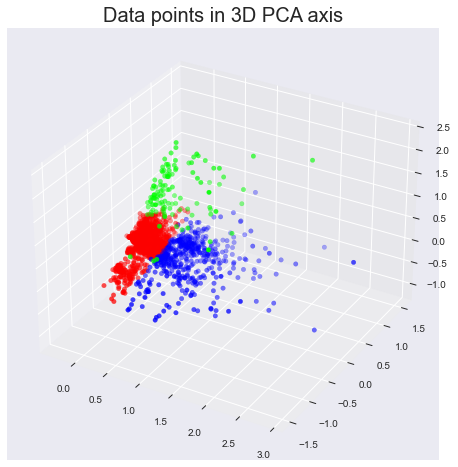

In [96]:
#Generating scatter plot for 3 clusters
KMeansModel = KMeans(n_clusters=3)
plt.rcParams['figure.figsize'] = (6, 6)
clusters = KMeansModel.fit_predict(pca_fit)
cmhot = plt.get_cmap('brg')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_fit[0], pca_fit[2], pca_fit[1],c=clusters,cmap=cmhot)
plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

From the above scatter plot, we can observe that the green cluster is closely packed in the center whereas the blue and the red are spread out.

### a) Elbow Method

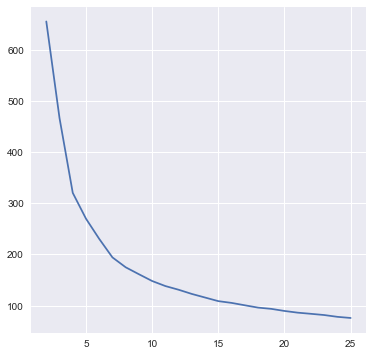

In [97]:
TSS = []
for i in range(2,26):
    ElbowModel = KMeans(n_clusters=i,random_state=0)
    #using elbow method to find the optimal k value
    ElbowModel.fit(pca_fit)
    TSS.append(ElbowModel.inertia_)
plt.plot(range(2,26),TSS,'-')

The elbow model generated here has an elbow point at k = 3 and k = 6

### b) Silhouette Analysis

In [98]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

For n_clusters = 3 The average silhouette_score is : 0.6633171440480458
For n_clusters = 4 The average silhouette_score is : 0.6956957694393607
For n_clusters = 5 The average silhouette_score is : 0.5193584475117571
For n_clusters = 6 The average silhouette_score is : 0.5452523360773244
For n_clusters = 7 The average silhouette_score is : 0.5575726357198922
For n_clusters = 8 The average silhouette_score is : 0.5422567295188624


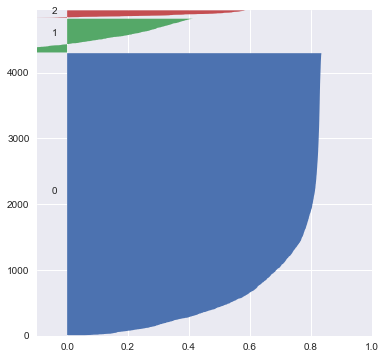

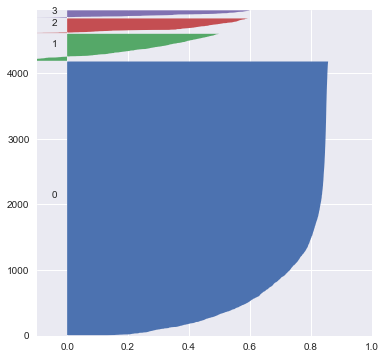

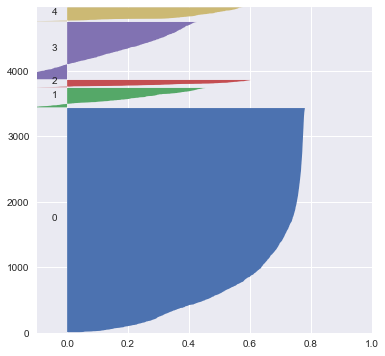

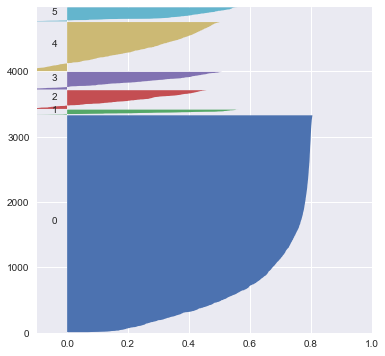

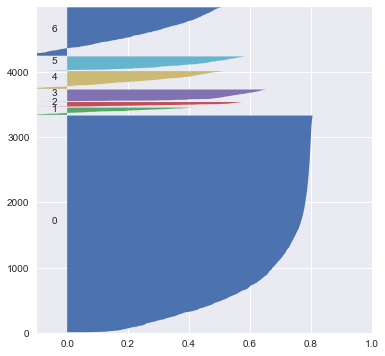

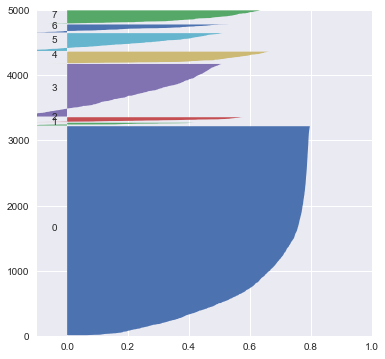

In [99]:
for n in [3,4,5,6,7,8]:
    ax1 = plt.figure().gca()
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(pca_fit) + (n + 1) * 10])
    km = KMeans(n_clusters=n,random_state=0)
    clusters = km.fit_predict(pca_fit)
    silhouette_avg = silhouette_score(pca_fit, clusters)
    print("For n_clusters =", n,
          "The average silhouette_score is :", silhouette_avg)
    silhouette_values = silhouette_samples(pca_fit, clusters)
    y_start = 10
    for i in range(n):
        ith_cluster = np.sort(silhouette_values[clusters==i])
        cluster_size = ith_cluster.shape[0]
        y_end = y_start + cluster_size 
        ax1.fill_betweenx(np.arange(y_start, y_end),
                          0, ith_cluster)
        ax1.text(-0.05, y_start + 0.5 * cluster_size, str(i))
        y_start = y_end + 10

Above graphs show silhouette analysis for KMeans clustering on data with n_clusters = 3,4,5,6,7,8. We can see the best cluster at k=4.

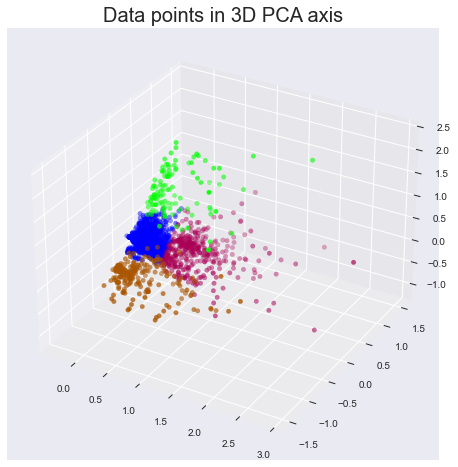

In [100]:
Kmeans_final = KMeans(n_clusters=4,random_state=0).fit(pca_fit)
Book_UserMatrix['cluster'] = Kmeans_final.labels_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_fit[0], pca_fit[2], pca_fit[1],c=Book_UserMatrix['cluster'],cmap=cmhot)
plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()
# Gettings the books for each cluster
cl1_books = Book_UserMatrix[Book_UserMatrix.cluster == 0].mean()
cl2_books = Book_UserMatrix[Book_UserMatrix.cluster == 1].mean()
cl3_books = Book_UserMatrix[Book_UserMatrix.cluster == 2].mean()
cl4_books = Book_UserMatrix[Book_UserMatrix.cluster == 3].mean()
# Getting the users for each cluster
cl1_users = Book_UserMatrix[Book_UserMatrix.cluster == 0].index
cl2_users = Book_UserMatrix[Book_UserMatrix.cluster == 1].index
cl3_users = Book_UserMatrix[Book_UserMatrix.cluster == 2].index
cl4_users = Book_UserMatrix[Book_UserMatrix.cluster == 3].index

The above scatter plot consists of 4 clusters that represent books and users. Blue cluster is in the middle with tightly packed centroid wheres clusters in green,purple and brown are spread across.

### Cluster 1 (Predicting top 5 books and top 5 authors)

In [101]:
def cluster_books_des(Ser):
    bks = pd.DataFrame(Ser).merge(Book_Data,left_index=True,right_on='ISBN',how='left')
    bks.rename(columns={0:'avg_score'},inplace=True)
    bks.sort_values(by='avg_score',ascending=False,inplace=True)
    print('Median Year:',int(bks['Year_Of_Publication'].median()))
    print('\nTop 5 Books\n')
    Top5_books = bks.index[:5]
    for i,isbn in enumerate(Top5_books):
        print(str(i+1)+'.',bks.loc[isbn]['Book_Title'])
    Top5_authors = bks['Book_Author'].unique()[:5]
    print('Top 5 Authors\n')
    for i,auth in enumerate(Top5_authors):
        print(str(i+1)+'.',auth)
cluster_books_des(cl1_books)

Median Year: 1997

Top 5 Books

1. Interview with the Vampire
2. Jurassic Park
3. Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
4. The Red Tent (Bestselling Backlist)
5. Fahrenheit 451
Top 5 Authors

1. Anne Rice
2. Michael Crichton
3. J. K. Rowling
4. Anita Diamant
5. RAY BRADBURY


Most Common Location: toronto, ontario, canada

Mean Age: 35.8300889674084


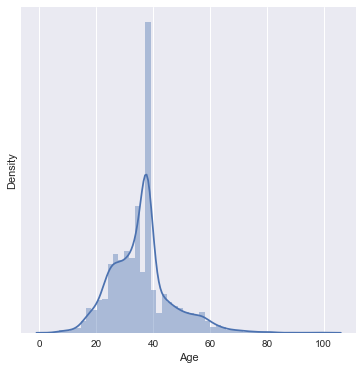

In [102]:
def cluster_user_des(Ser):
    cl_user = User_Data[User_Data['User_ID'].isin(list(Ser))]
    print('Most Common Location:',cl_user['Location'].mode()[0])
    print('\nMean Age:',cl_user['Age'].mean())
    sns.distplot(cl_user['Age'])
    plt.yticks([])
cluster_user_des(cl1_users)

From the above histplot, we can conclude that the cluster 1 has predicted age group 35 to 40 has the maximum density.

### Cluster 2 (Predicting top 5 books and top 5 authors)

In [103]:
cluster_books_des(cl2_books.drop('cluster'))

Median Year: 1997

Top 5 Books

1. The Lovely Bones: A Novel
2. Where the Heart Is (Oprah's Book Club (Paperback))
3. The Secret Life of Bees
4. The Pilot's Wife : A Novel
5. The Red Tent (Bestselling Backlist)
Top 5 Authors

1. Alice Sebold
2. Billie Letts
3. Sue Monk Kidd
4. Anita Shreve
5. Anita Diamant


Most Common Location: toronto, ontario, canada

Mean Age: 35.22699957856463


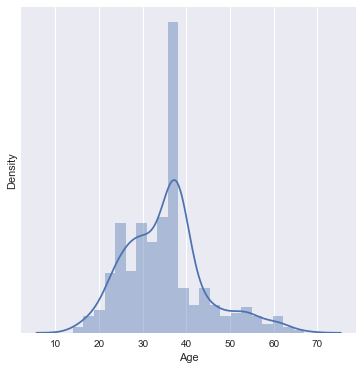

In [104]:
cluster_user_des(cl2_users)

From the above histplot, we can conclude that the cluster 2 has predicted age group 35 to 40 has the maximum density.

### Cluster 3 (Predicting top 5 books and top 5 authors)

In [105]:
cluster_books_des(cl3_books.drop('cluster'))

Median Year: 1997

Top 5 Books

1. The Da Vinci Code
2. Angels &amp; Demons
3. The Five People You Meet in Heaven
4. The Secret Life of Bees
5. The Red Tent (Bestselling Backlist)
Top 5 Authors

1. Dan Brown
2. Mitch Albom
3. Sue Monk Kidd
4. Anita Diamant
5. Alice Sebold


Most Common Location: portland, oregon, usa

Mean Age: 36.77608191699115


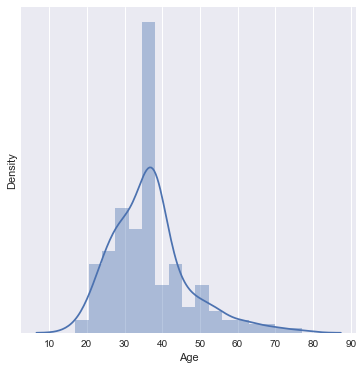

In [106]:
cluster_user_des(cl3_users)

From the above histplot, we can conclude that the cluster 3 has predicted age group 38 to 40 has the maximum density.

### Cluster 4 (Predicting top 5 books and top 5 authors)

In [107]:
cluster_books_des(cl4_books.drop('cluster'))

Median Year: 1997

Top 5 Books

1. Harry Potter and the Order of the Phoenix (Book 5)
2. Harry Potter and the Chamber of Secrets (Book 2)
3. Harry Potter and the Prisoner of Azkaban (Book 3)
4. Harry Potter and the Goblet of Fire (Book 4)
5. Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Top 5 Authors

1. J. K. Rowling
2. J.R.R. TOLKIEN
3. J.D. Salinger
4. Thomas Harris
5. Richard Carlson


Most Common Location: chicago, illinois, usa

Mean Age: 30.40611418146698


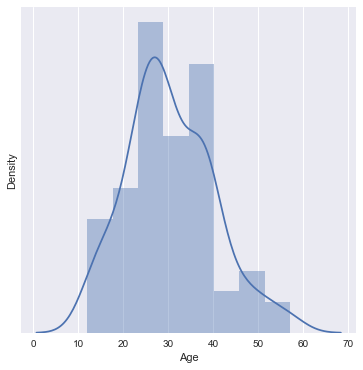

In [108]:
cluster_user_des(cl4_users)

From the above histplot, we can conclude that the cluster 4 has predicted age group 25 to 30 has the maximum density.

## <span style="color:Purple">Collaborative Filtering using SURPRISE</span>

Surprise Library : 

The Surprise package in Python provided all the tools we needed to test out multiple algorithms for Collaborative Filtering and then guided me through tuning the parameters and cross validating to determine the optimal model. In order to this, we chose three versions of the data to analyze. First, we looked at the most popular books only, filtering down to those with at least 10 book ratings and at least 30 user ratings. We then created a list of midlist books by filtering down to 2 book rating and 20 user ratings. Finally, We used the full list to include books that have as little as 1 book rating and 1 user rating.

In [109]:
conda install -c conda-forge scikit-surprise

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [110]:
from surprise import Reader
from surprise import Dataset
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import accuracy
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV


In [111]:
combine_book_rating

,User_ID,ISBN,Book_Rating,rating_Avg,rating_sum,Book_Title
0,277427,002542730X,10,7.805195,601,Politically Correct Bedtime Stories: Modern Ta...
1,11676,002542730X,6,7.805195,601,Politically Correct Bedtime Stories: Modern Ta...
2,12538,002542730X,10,7.805195,601,Politically Correct Bedtime Stories: Modern Ta...
3,52584,002542730X,10,7.805195,601,Politically Correct Bedtime Stories: Modern Ta...
4,110934,002542730X,6,7.805195,601,Politically Correct Bedtime Stories: Modern Ta...
...,...,...,...,...,...,...
102084,275970,1586632043,10,10.000000,10,The Book of Great Books: A Guide to 100 World ...
102085,275970,1845170423,7,7.000000,7,Cocktail Classics
102086,275970,185649814X,7,7.000000,7,100 Ways of Seeing an Unequal World
102087,275970,3411086211,10,10.000000,10,Die Biene.


In [112]:
# full df, even books with very few ratings or users

BookRating_full = combine_book_rating 
reader = Reader(rating_scale=(1, 10))
Data_full = Dataset.load_from_df(BookRating_full[['User_ID', 'ISBN', 'Book_Rating']], reader)

In [113]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(),KNNBaseline(), KNNWithMeans(), KNNWithZScore(), BaselineOnly()]:
    # Perform cross validation
    results = cross_validate(algorithm, Data_full, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


In [114]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
print("+++ Algorithm results for full data +++") 
surprise_results # lowest = SVDpp

+++ Algorithm results for full data +++


,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,1.493199,0.418239,0.349513
SVD,1.501483,7.258037,0.374830
KNNBaseline,1.610436,0.441745,0.616241
KNNWithZScore,1.807403,0.174771,0.708000
KNNWithMeans,1.810462,0.092355,0.532248


In [115]:
# trim df (2/book, 20/user = RS for backlist books)

min_book_ratings = 2
filter_books = combine_book_rating['ISBN'].value_counts() > min_book_ratings
filter_books = filter_books[filter_books].index.tolist()

min_user_ratings = 20
filter_users = combine_book_rating['User_ID'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_mid = combine_book_rating[(combine_book_rating['ISBN'].isin(filter_books)) & (combine_book_rating['User_ID'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(combine_book_rating.shape))
print('The midlist data frame shape:\t{}'.format(df_mid.shape))

The original data frame shape:	(102089, 6)
The midlist data frame shape:	(34861, 6)


In [116]:
data2 = Dataset.load_from_df(df_mid[['User_ID', 'ISBN', 'Book_Rating']], reader)

In [117]:
benchmark2 = []
# Iterate over all algorithms
for algorithm in [SVD(),KNNBaseline(), KNNWithMeans(), KNNWithZScore(), BaselineOnly()]:
    # Perform cross validation
    results2 = cross_validate(algorithm, data2, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp2 = pd.DataFrame.from_dict(results2).mean(axis=0)
    tmp2 = tmp2.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark2.append(tmp2)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


In [118]:
surprise_results2 = pd.DataFrame(benchmark2).set_index('Algorithm').sort_values('test_rmse')
print("+++ Algorithm results for midlist data +++") 
surprise_results2 # lowest = SVDpp

+++ Algorithm results for midlist data +++


,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,1.479664,0.101022,0.077095
SVD,1.489623,2.296144,0.175681
KNNWithZScore,1.703449,0.090847,0.294768
KNNWithMeans,1.707851,0.050569,0.265350
KNNBaseline,1.710648,0.114091,0.333612


In [119]:
# trim df (10/book, 30/user = RS for most popular books)

min_book_ratings = 10
filter_books = combine_book_rating['ISBN'].value_counts() > min_book_ratings
filter_books = filter_books[filter_books].index.tolist()

min_user_ratings = 30
filter_users = combine_book_rating['User_ID'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_pop = combine_book_rating[(combine_book_rating['ISBN'].isin(filter_books)) & (combine_book_rating['User_ID'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(combine_book_rating.shape))
print('The midlist data frame shape:\t{}'.format(df_pop.shape))

The original data frame shape:	(102089, 6)
The midlist data frame shape:	(8074, 6)


In [120]:
data3 = Dataset.load_from_df(df_pop[['User_ID', 'ISBN', 'Book_Rating']], reader)

In [121]:
benchmark3 = []
# Iterate over all algorithms
for algorithm in [SVD(),KNNBaseline(), KNNWithMeans(), KNNWithZScore(), BaselineOnly()]:
    # Perform cross validation
    results2 = cross_validate(algorithm, data3, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp2 = pd.DataFrame.from_dict(results2).mean(axis=0)
    tmp2 = tmp2.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark3.append(tmp2)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


In [122]:
surprise_results2 = pd.DataFrame(benchmark3).set_index('Algorithm').sort_values('test_rmse')
print("+++ Algorithm results for midlist data +++") 
surprise_results2 # lowest = SVDpp

+++ Algorithm results for midlist data +++


,test_rmse,fit_time,test_time
Algorithm,,,
SVD,1.514591,0.502366,0.029120
BaselineOnly,1.536554,0.011295,0.015050
KNNWithMeans,1.641203,0.028850,0.087586
KNNWithZScore,1.645160,0.060714,0.095059
KNNBaseline,1.662301,0.016345,0.127409


Using the top rated algorithms above, I choose to run a GridSearchCV on KNNBaseline, BaselineOnly, and KNNWithMeans. After completing the gridsearches, I ran 10-fold cross validation on each of the tuned models and plotted the results.Based on surprise results, KNNBaseline ultimely performed best compared to BaselineOnly,KNNWithMeans and KNNWithZScore.

## Grid Search on Top algorithms to identify optimal parameters

### Top algorithms = KNNBaseline, BaselineOnly, KNNWithMeans

In [123]:
GridData = Dataset.load_from_df(combine_book_rating[['User_ID', 'ISBN', 'Book_Rating']], reader)

###   a) GridSearch on KNNBaseline

In [124]:
# gridsearch on KNNBaseline
pg_KNNBaseline = {'bsl_options': {'method': ['als']},
              'k': [10, 30, 50],
              'sim_options': {'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
                              'min_support': [1, 5],
                              'user_based': [True]}
              }
gs_KNNBaseline = GridSearchCV(KNNBaseline, pg_KNNBaseline, measures = ['rmse'], cv = 3)
gs_KNNBaseline.fit(GridData)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine sim

In [125]:
print(gs_KNNBaseline.best_score['rmse'])

1.54407860249507


In [126]:
print(gs_KNNBaseline.best_params['rmse'])

{'bsl_options': {'method': 'als'}, 'k': 30, 'sim_options': {'name': 'pearson_baseline', 'min_support': 5, 'user_based': True}}


### b) GridSearch on BaselineOnly

In [127]:
# gridsearch on BaselineOnly
pg_BaselineOnly = {'bsl_options': {'method': ['als', 'sgd'],
                                  'n_epochs': [10, 25, 50]}
              }
gs_BaselineOnly = GridSearchCV(BaselineOnly, pg_BaselineOnly, measures = ['rmse'], cv = 3)
gs_BaselineOnly.fit(GridData)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


In [128]:
print(gs_BaselineOnly.best_score['rmse'])

1.4906776471337313


In [129]:
print(gs_BaselineOnly.best_params['rmse'])

{'bsl_options': {'method': 'sgd', 'n_epochs': 25}}


### c) GridSearch on KNNWithMeans

In [130]:
# gridsearch on KNNWithMeans
pg_KNNWithMeans = {'name': ['cosine', 'msd', 'pearson', 'pearson_baseline'],
                   'user_based': [True, False]
              }
gs_KNNWithMeans = GridSearchCV(KNNWithMeans, pg_KNNWithMeans, measures = ['rmse'], cv = 3)
gs_KNNWithMeans.fit(GridData)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [131]:
print(gs_KNNWithMeans.best_score['rmse'])

1.8057152171272042


In [132]:
print(gs_KNNWithMeans.best_params['rmse'])

{'name': 'cosine', 'user_based': True}


## Performing Cross Validation on Top algorithms and Plot their RMSE

In [133]:
import surprise
from sklearn.model_selection import train_test_split

kSplit = surprise.model_selection.split.KFold(n_splits=10, shuffle=True) # split data into 10 folds

In [134]:
rawTrain,rawholdout = train_test_split(Book_Ratings_Data, test_size=0.25 )
# when importing from a DF, you only need to specify the scale of the ratings.
reader = surprise.Reader(rating_scale=(1,10)) 
#into surprise:
Ratingdata = surprise.Dataset.load_from_df(Book_Ratings_Data, reader)
# holdout = surprise.Dataset.load_from_df(rawholdout,reader)

In [135]:
rmseKNNBaseline = []
rmseBaselineOnly = []
rmseKNNWithMeans = []

In [136]:
# KNNBaseline algorithm

sim_options = {'name': 'pearson_baseline','user_based': True}
bsl_options = {'method': 'als'}

algo_KNNBaseline = surprise.prediction_algorithms.knns.KNNBaseline(k = 30, sim_options = sim_options, 
                                                                   bsl_options = bsl_options, verbose=True)
for trainset, testset in kSplit.split(GridData):
    algo_KNNBaseline.fit(trainset)
    predictionsKNN = algo_KNNBaseline.test(testset)
    rmseKNNBaseline.append(surprise.accuracy.rmse(predictionsKNN,verbose=True))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.5999
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.5895
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.5521
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.5767
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.5566
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.5729
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.6062
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done co

In [137]:
# BaselineOnly algorithm

pg_BaselineOnly = {'bsl_options': {'method': ['sgd'],
                                  'n_epochs': [25]}}
algo_BaselineOnly = surprise.prediction_algorithms.baseline_only.BaselineOnly(pg_BaselineOnly)
for trainset, testset in kSplit.split(GridData):
    algo_BaselineOnly.fit(trainset)
    predictionsBaselineOnly = algo_BaselineOnly.test(testset)
    rmseBaselineOnly.append(surprise.accuracy.rmse(predictionsBaselineOnly,verbose=True))

Estimating biases using als...
RMSE: 1.4978
Estimating biases using als...
RMSE: 1.4919
Estimating biases using als...
RMSE: 1.4876
Estimating biases using als...
RMSE: 1.4550
Estimating biases using als...
RMSE: 1.4815
Estimating biases using als...
RMSE: 1.5091
Estimating biases using als...
RMSE: 1.5029
Estimating biases using als...
RMSE: 1.4782
Estimating biases using als...
RMSE: 1.4686
Estimating biases using als...
RMSE: 1.5113


In [138]:
# KNNWithMeans algorithm

pg_KNNWithMeans = {'name': ['cosine'],
                  'user_based': True}
algo_KNNWithMeans = surprise.prediction_algorithms.knns.KNNWithMeans()
for trainset, testset in kSplit.split(GridData): 
    algo_KNNWithMeans.fit(trainset)
    predictionsKNNWithMeans = algo_KNNWithMeans.test(testset)
    rmseKNNWithMeans.append(surprise.accuracy.rmse(predictionsKNNWithMeans,verbose=True))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.7959
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.7956
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.7889
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.8100
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.7980
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.8119
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.8138
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.8062
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.7677
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.8054


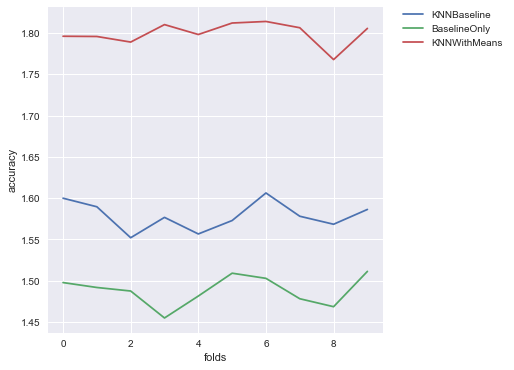

In [139]:
#plt.plot(rmseSVDpp,label='SVDpp')
plt.plot(rmseKNNBaseline,label='KNNBaseline')
plt.plot(rmseBaselineOnly,label='BaselineOnly')
plt.plot(rmseKNNWithMeans,label='KNNWithMeans')

plt.xlabel('folds')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

From the graph above we can observe that the accuracy is highest for KNNWithMeans at 1.78. Whereas, the accuracy for KNNBaseline and BaselineOnly is 1.58 and 1.48 repectively.

## Using one Optimized model to recommend books - KNN Baseline Approach 

In [145]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
from collections import defaultdict

from surprise import SVDpp
from surprise import Dataset


def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.
    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.
    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [146]:
# Train the optimized algorithm on the dataset

trainset = GridData.build_full_trainset()
algo_KNNBaseline.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [131]:
# predict ratings for all user/item pairs that are NOT in the training set
testset = trainset.build_anti_testset()
predictions = algo_KNNBaseline.test(testset)

### Top 10 Book Predictions for all the Users

In [132]:
top_n = get_top_n(predictions, n = 10)

In [149]:
top_n

defaultdict(list,
            {277427: [('0671019961', 10),
              ('0140386645', 10),
              ('0812575717', 10),
              ('0836204387', 10),
              ('0836218256', 10),
              ('0836218787', 10),
              ('0836220889', 10),
              ('0836221362', 10),
              ('0920668372', 10),
              ('0345283929', 10)],
             11676: [('0743406176', 10),
              ('0310912520', 10),
              ('0395681863', 10),
              ('0440479002', 10),
              ('0440800129', 10),
              ('0553202790', 10),
              ('0553271571', 10),
              ('0590117653', 10),
              ('0671019961', 10),
              ('0898151899', 10)],
             12538: [('0385504209', 10),
              ('0811811409', 10),
              ('0898157803', 10),
              ('0836218256', 10),
              ('0920668372', 10),
              ('0515136557', 10),
              ('0140042598', 10),
              ('0312187106', 10),
      

In [161]:
# print recommended items for each user
recommendations = {}
for uid, user_ratings in top_n.items():
    recommendations.update({uid: [iid for (iid, _) in user_ratings]})
predictions = recommendations[269566]#Random User

['0440428130',
 '0316734837',
 '0440404908',
 '0440440629',
 '0440941407',
 '0440984696',
 '0552996181',
 '068484611X',
 '0590996835',
 '0671733354']

In [134]:
type(top_n)

collections.defaultdict

In [136]:
Book_Data.columns
books = Book_Data.copy()

In [138]:
books = books[['ISBN', 'Book_Title', 'Book_Author', 'Year_Of_Publication', 'Publisher',
       'Image_URL_S', 'Image_URL_M', 'Image_L']]
books.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [139]:
Book_Ratings_Data.head()

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Predicting Book Ratings for a given User 

In [150]:
ratings2 = pd.DataFrame(Book_Ratings_Data[Book_Ratings_Data['User_ID'] == 277427])
print(ratings2)

      User_ID        ISBN  Book_Rating
1456   277427  002542730X           10
1457   277427  0026217457            0
1458   277427  003008685X            8
1459   277427  0030615321            0
1460   277427  0060002050            0
...       ...         ...          ...
1948   277427  1852303468            7
1949   277427  1887128255            0
1950   277427  1930285000            8
1951   277427  8251800811            7
1952   277427  8495273829            0

[497 rows x 3 columns]


In [151]:
ratings2 = pd.merge(ratings2, books, how = 'left', on = 'ISBN')
ratings2

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_L
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995.0,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974.0,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982.0,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002.0,Avon Books,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...
...,...,...,...,...,...,...,...,...,...,...
492,277427,1852303468,7,The Alexander Technique Workbook: Your Persona...,Richard Brennan,1992.0,Element Books,http://images.amazon.com/images/P/1852303468.0...,http://images.amazon.com/images/P/1852303468.0...,http://images.amazon.com/images/P/1852303468.0...
493,277427,1887128255,0,The Haiku Year,Tom Gilroy,1998.0,"Soft Skull Press, Inc.",http://images.amazon.com/images/P/1887128255.0...,http://images.amazon.com/images/P/1887128255.0...,http://images.amazon.com/images/P/1887128255.0...
494,277427,1930285000,8,How to Develop a Powerful Prayer Life,Gregory R. Frizzell,2000.0,Master Design,http://images.amazon.com/images/P/1930285000.0...,http://images.amazon.com/images/P/1930285000.0...,http://images.amazon.com/images/P/1930285000.0...
495,277427,8251800811,7,A Time for Trolls: Fairy Tales from Norway,Peter C. Asbjornsen,1992.0,Arthur Vanous Co,http://images.amazon.com/images/P/8251800811.0...,http://images.amazon.com/images/P/8251800811.0...,http://images.amazon.com/images/P/8251800811.0...


In [154]:
user2 = pd.DataFrame(top_n[277427])
user2.columns = ['ISBN',"PRED_RATING"]
user2.head()

,ISBN,PRED_RATING
0,0671019961,10
1,0140386645,10
2,0812575717,10
3,0836204387,10
4,0836218256,10


In [155]:
user2 = pd.merge(user2, books, how = 'left', on = 'ISBN')
user2

,ISBN,PRED_RATING,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_L
0,0671019961,10,Public Enemies : The Host of America's Most Wa...,John Walsh,2002.0,Pocket Star,http://images.amazon.com/images/P/0671019961.0...,http://images.amazon.com/images/P/0671019961.0...,http://images.amazon.com/images/P/0671019961.0...
1,0140386645,10,The Westing Game (Now in Speak!),Ellen Raskin,1997.0,Penguin Putnam Books for Young Readers,http://images.amazon.com/images/P/0140386645.0...,http://images.amazon.com/images/P/0140386645.0...,http://images.amazon.com/images/P/0140386645.0...
2,0812575717,10,Ender's Shadow,Orson Scott Card,2000.0,Tor Books,http://images.amazon.com/images/P/0812575717.0...,http://images.amazon.com/images/P/0812575717.0...,http://images.amazon.com/images/P/0812575717.0...
3,0836204387,10,The Calvin and Hobbes Tenth Anniversary Book,Bill Watterson,1995.0,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836204387.0...,http://images.amazon.com/images/P/0836204387.0...,http://images.amazon.com/images/P/0836204387.0...
4,0836218256,10,Something Under the Bed Is Drooling,Bill Watterson,1988.0,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836218256.0...,http://images.amazon.com/images/P/0836218256.0...,http://images.amazon.com/images/P/0836218256.0...
5,0836218787,10,Scientific Progress Goes 'Boink': A Calvin an...,Bill Watterson,1991.0,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836218787.0...,http://images.amazon.com/images/P/0836218787.0...,http://images.amazon.com/images/P/0836218787.0...
6,0836220889,10,Calvin and Hobbes,Bill Watterson,1987.0,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836220889.0...,http://images.amazon.com/images/P/0836220889.0...,http://images.amazon.com/images/P/0836220889.0...
7,0836221362,10,It's A Magical World: A Calvin and Hobbes Coll...,Bill Watterson,1996.0,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836221362.0...,http://images.amazon.com/images/P/0836221362.0...,http://images.amazon.com/images/P/0836221362.0...
8,0920668372,10,Love You Forever,Robert N. Munsch,1986.0,Firefly Books Ltd,http://images.amazon.com/images/P/0920668372.0...,http://images.amazon.com/images/P/0920668372.0...,http://images.amazon.com/images/P/0920668372.0...
9,0345283929,10,Empire Strikes Back Wars,Donald F Glut,1980.0,Ballantine Books,http://images.amazon.com/images/P/0345283929.0...,http://images.amazon.com/images/P/0345283929.0...,http://images.amazon.com/images/P/0345283929.0...


Here in this block of code, Initially we have predicted a list of 10 Books for each User, and then we have considered one single user and predicted the ratings that he would rate his book suggestions. 
We see that for a User = 277427, Above are his top 10 book recommendations and his predicted ratings for those book recommendations. 